
**Seminar Neural Network for Finance, 2024 Spring**

Lecture 4: Introduction to Pytorch

Zhipeng Huang, z.huang1@uu.nl


# **Sec 1: Basics of Pytorch**

## Creation of Tensors

In [ ]:
# @title
############# create tensor from an existing list
%reset  -f
import numpy as np
import torch

data_list = [[0.0, 1.0], [2.0, 3.0]]
data_tensor = torch.tensor(data_list)
# print(data_list)
# print(data_tensor)

# change the tensor does not change the list.
data_tensor[0][0] = 9.0     # modify one element of the tensor
print('the modfied tensor is: \n', data_tensor)
print('the original list does not change: \n', data_list)

the modfied tensor is: 
 tensor([[9., 1.],
        [2., 3.]])
the original list does not change: 
 [[0.0, 1.0], [2.0, 3.0]]


In [ ]:
############# create tensor from Numpy arrays
%reset  -f
import numpy as np
import torch

##### use torch.tensor (never share data)
data_nparray = np.array([[0.0, 1.0], [2.0, 3.0]])
data_tensor = torch.tensor(data_nparray)
data_tensor[0][0] = 9.0
print(data_tensor)
print(data_nparray)


##### use torch.from_numpy (share data)
data_nparray = np.array([[0.0, 1.0], [2.0, 3.0]])
data_tensor_2 = torch.from_numpy(data_nparray)
# modify the tensor will change the array
data_tensor_2[0][0]= - 9.0
print(data_tensor_2)
print(data_nparray)
# modify array will change the tensor
data_nparray[0][0]= - 10.0
print(data_tensor_2)
print(data_nparray)


##### use torch.as_tensor (share data)
data_nparray = np.array([[0.0, 1.0], [2.0, 3.0]])
data_tensor_3 = torch.as_tensor(data_nparray)
# modify the tensor will change the array
data_tensor_3[0][0] = 5.0
print(data_tensor_3)
print(data_nparray)
# modify array will change the tensor
data_nparray[0][0] = 7.0
print(data_tensor_3)
print(data_nparray)

tensor([[9., 1.],
        [2., 3.]], dtype=torch.float64)
[[0. 1.]
 [2. 3.]]
tensor([[-9.,  1.],
        [ 2.,  3.]], dtype=torch.float64)
[[-9.  1.]
 [ 2.  3.]]
tensor([[-10.,   1.],
        [  2.,   3.]], dtype=torch.float64)
[[-10.   1.]
 [  2.   3.]]
tensor([[5., 1.],
        [2., 3.]], dtype=torch.float64)
[[5. 1.]
 [2. 3.]]
tensor([[7., 1.],
        [2., 3.]], dtype=torch.float64)
[[7. 1.]
 [2. 3.]]


In [ ]:
############# create tensor from a given size/shape
%reset  -f
import numpy as np
import torch

## generate tensors with a specified size
size = [2, 3, 2]    # you can also write size = (2,3,2)
rand_tensor = torch.rand(size)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(size)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(size)
print(f"Zeros Tensor: \n {zeros_tensor}")

## generate tensors that have the same size as the given one
data_list = [[0.0, 1.0], [2.0, 3.0]]
data_tensor = torch.tensor(data_list)
x_ones = torch.ones_like(data_tensor)
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(data_tensor, dtype=torch.float32)
print(f"Random Tensor: \n {x_rand}, dtype={x_rand.dtype} \n")

Random Tensor: 
 tensor([[[0.4136, 0.9537],
         [0.9787, 0.0594],
         [0.9620, 0.9406]],

        [[0.8039, 0.7386],
         [0.4329, 0.1260],
         [0.2410, 0.4144]]]) 

Ones Tensor: 
 tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]]) 

Zeros Tensor: 
 tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])
Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.]]) 

Random Tensor: 
 tensor([[0.9020, 0.1492],
        [0.2825, 0.9417]]), dtype=torch.float32 



## Attributes of Tensors

In [ ]:
%reset  -f
import numpy as np
import torch

size = [3, 4]
x1 = torch.randn(size, device=torch.device('cpu'))
print(f"x1: \n dtype={x1.dtype}, device={x1.device}, layout={x1.layout}")
print(f"x1: \n shape={x1.shape}")
print(f"x1: \n size={x1.size()}")   # .size() gives the same result as .shape
print(f"the size of 0th dimension of x1 is: {x1.shape[0]}")

if torch.cuda.is_available():   # run the same piece of code if cuda is avaliable
    x2 = torch.randn(size, device=torch.device('cuda'))
    print(f"x2: \n dtype={x2.dtype}, device={x2.device}, layout={x2.layout}")

x1: 
 dtype=torch.float32, device=cpu, layout=torch.strided
x1: 
 shape=torch.Size([3, 4])
x1: 
 size=torch.Size([3, 4])
the size of 0th dimension of x1 is: 3


# **Sec 1.2: Operations on Tensors**

In [ ]:
# @title
%reset  -f
import numpy as np
import torch

## usage of .transpose
x1 = torch.rand(1, 2, 3)
x1_a = torch.transpose(x1, dim0=1, dim1=2)  # shape = [1,3,2]
x1_a[0, 0, 1] = 1.    # modify an element of it
print(x1_a)
print(x1)   # the element in x1 becomes 1 as well, so .transpose shares data

## usage of .sum, .mean, .std
x2 = torch.randn(2, 3)  # 2d tensor
print(x2)
torch.sum(x2)   # sum all elements and return a 0d tensor
torch.sum(x2, dim = 0, keepdim=False)   # 1d tensor
torch.sum(x2, dim = 0, keepdim=True)    # 2d tensor
torch.mean(x2, dim = 0, keepdim = True)
torch.std(x2, dim = 1, keepdim=True)

## usage of .reshape
x3 = torch.randn(2, 3)
x3_a = torch.reshape(x3, shape=[3, 2])

## usage of .squeeze, squeeze the dimensions of size 1
x4 = torch.zeros(4, 1, 1, 1, 3)
x4_a = torch.squeeze(x4)
x4_b = torch.squeeze(x4, dim = [1, 2])
x4_b.size()
x4_b[0,0,0] = 1.    # this shows that they all share data

## usage of .unsqueeze (add a dimension with size 1)
x5 = torch.randn(2, 3)
x5_a = torch.unsqueeze(x5, dim = 0)
x5_a.shape
x5_a[0,0,0] = 1.


tensor([[[0.9292, 1.0000],
         [0.2101, 0.0574],
         [0.1751, 0.8172]]])
tensor([[[0.9292, 0.2101, 0.1751],
         [1.0000, 0.0574, 0.8172]]])
tensor([[-0.5999,  1.0035,  0.4725],
        [-2.7637, -0.9978, -0.9895]])


In [ ]:
# @title
%reset  -f
import numpy as np
import torch

### usual element wise operations when x and y have the same shape
x = torch.tensor([[1.0, 1.0], [2.0, 3.0]])
y = torch.tensor([[0.1, 0.1], [0.2, 0.3]])
z_add = x + y   # elementwise addition
z_sub = x - y   # elementwise subtraction
z_mul = x * y   # elementwise multiplication
z_div = x / y   # elementwise division
print('addition: \n', z_add)
print('subtraction: \n', z_sub)
print('multiplication: \n', z_mul)
print('division: \n', z_div)

### matrix-matrix(or vecotr) multiplication when tensors have compatiable shape
# matrix-matrix multiplication (2d tensor @ 2d tensor)
X = torch.tensor([[0., 1., 2.], [3., 4., 5.]])
Y = torch.tensor([[6., 9.], [7., 10.], [8., 11.]])
Z = X @ Y  # usual matrix multipllication
Z_matmul = torch.matmul(X, Y)
print('matrix times a matrix: \n',  Z)
print(Z_matmul)   # .matmul is the same as @
# matrix-vector multiplication (2d tensor @ 1d tensorm, or 1d@2d)
y = torch.tensor([6., 7., 8.])
z_1 = X @ y
z_2 = y @ torch.transpose(X, 0, 1)
print('matrix times a vector: \n',  z_1)
print('vector times a matrix: \n',  z_2)  # same as z_1.

# matrix-vector multiplication (1d tensor @ 1d tensor)
y_dotprod = y @ y
print('dot product of vectors: \n',  y_dotprod)

addition: 
 tensor([[1.1000, 1.1000],
        [2.2000, 3.3000]])
subtraction: 
 tensor([[0.9000, 0.9000],
        [1.8000, 2.7000]])
multiplication: 
 tensor([[0.1000, 0.1000],
        [0.4000, 0.9000]])
division: 
 tensor([[10., 10.],
        [10., 10.]])
matrix times a matrix: 
 tensor([[ 23.,  32.],
        [ 86., 122.]])
tensor([[ 23.,  32.],
        [ 86., 122.]])
matrix times a vector: 
 tensor([23., 86.])
vector times a matrix: 
 tensor([23., 86.])
dot product of vectors: 
 tensor(149.)


In [ ]:
# @title
%reset  -f
import numpy as np
import torch
######### broadcastable and non-broadcastable examples
#### example 1
x = torch.tensor([[1.0], [0.1]])   # size=[2, 1]
y = torch.tensor([[4.0, 5.0]])    # size=[1, 2]
z = x * y   # size=[2, 2]
print(z)
print(z * 2.)
print(z * torch.tensor(2.))

#### example 2
x = torch.tensor([[1., 0.], [0., 1.]])
y = torch.randn([3, 2, 2])
print(x.shape)
print(y.shape)
z = x @ y
print(x)
print(y)
print(z)
# print(x @ torch.tensor(2.))
# print(torch.matmul(x, 2.))

#### example 3
x = torch.tensor([[1., 0.], [0., 1.]])  # 2d tensor
y = torch.randn([3, 2, 2])    # 3d tensor
print(x.shape)
print(y.shape)
# torch.mm does not support broadcast, and
# it output the same as torch.matmul if dims of x and y are not greater than 2d
print(torch.mm(x, y))   # report error as y is a 3d tensor

tensor([[4.0000, 5.0000],
        [0.4000, 0.5000]])
tensor([[ 8.0000, 10.0000],
        [ 0.8000,  1.0000]])
tensor([[ 8.0000, 10.0000],
        [ 0.8000,  1.0000]])
torch.Size([2, 2])
torch.Size([3, 2, 2])
tensor([[1., 0.],
        [0., 1.]])
tensor([[[ 0.1908,  1.0046],
         [-0.3101, -0.1149]],

        [[-1.3053,  0.1296],
         [ 0.1745, -1.2162]],

        [[ 2.1809,  0.0373],
         [-0.4103, -1.1281]]])
tensor([[[ 0.1908,  1.0046],
         [-0.3101, -0.1149]],

        [[-1.3053,  0.1296],
         [ 0.1745, -1.2162]],

        [[ 2.1809,  0.0373],
         [-0.4103, -1.1281]]])
torch.Size([2, 2])
torch.Size([3, 2, 2])


RuntimeError: mat2 must be a matrix

# **Sec 1.3: Computational graph and automatic differentiation**

## automatic differentiation directly using .backward()

In [ ]:
# @title
### automatic differentiation directly using .backward()
%reset  -f
import numpy as np
import torch

x = torch.tensor(2.0, requires_grad = False)  # default setting is False
w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(3.0, requires_grad = True)
wx = w * x
z = wx + b
y = torch.cos(z)
y.backward()

print(w.grad, b.grad)

tensor(1.9178) tensor(0.9589)


## automatic differentiation using low level functions (step by step)

In [ ]:
# @title
### automatic differentiation using low level functions (step by step)
%reset  -f
import torch


x = torch.tensor(0.5, requires_grad = False)
w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(0.5 * torch.pi - 0.5, requires_grad = True)

### forwrad pass
wx = w * x
z = wx + b
y = torch.cos(z)

### fetch gradients backward using grad_fn
grad_cos_back = y.grad_fn
print(y.grad_fn)
dy_dy = torch.tensor(1.0)
dy_dz = grad_cos_back(dy_dy)
print('grad_cos_back',grad_cos_back,'\n dy/dz=',dy_dz)
# y.grad_fn compute the gradient of y w.r.t z, that is,
# gradient of the most recent operation

# use next_functions of grad_fn to walk backward
print(y.grad_fn.next_functions)
print(y.grad_fn.next_functions[0][0])
grad_add_back = y.grad_fn.next_functions[0][0]
dy_dwx, dy_db = grad_add_back(dy_dz)
print('grad_add_back ',grad_add_back)
print('dy/dwx=',dy_dwx,'\n dy/db=',dy_db)

# repeatly using .next_functions to move one more step backward
grad_mul_back = y.grad_fn.next_functions[0][0].next_functions[0][0]
dy_dw = grad_mul_back(dy_dwx)
print('dy/dw=',dy_dw)

# compare the step by step result with result of .backward()
y.backward()
print('w.grad=', w.grad, '\n b.grad', b.grad)
print('dy/dw=', dy_dw, '\n dy/db=', dy_db)

grad_cos_back <CosBackward0 object at 0x7970b37ed1b0> 
 dy/dz= tensor(-1., grad_fn=<MulBackward0>)
((<AddBackward0 object at 0x79716b6a09a0>, 0),)
grad_add_back  <AddBackward0 object at 0x79716b6a09a0>
dy/dwx= tensor(-1., grad_fn=<MulBackward0>) 
 dy/db= tensor(-1., grad_fn=<MulBackward0>)
dy/dw= (tensor(-0.5000, grad_fn=<MulBackward0>), None)
w.grad= tensor(-0.5000) 
 b.grad tensor(-1.)
dy/dw= (tensor(-0.5000, grad_fn=<MulBackward0>), None) 
 dy/db= tensor(-1., grad_fn=<MulBackward0>)


# **Sec 1.4 Example: Polynomial approximation**

Iteration 99 Loss= 10517.584145629242
Iteration 1099 Loss= 1398.3274490514796
Iteration 2099 Loss= 620.9808046146113
Iteration 3099 Loss= 467.0908818877444
Iteration 4099 Loss= 377.2540177071206
Iteration 5099 Loss= 307.32514113107334
Iteration 6099 Loss= 251.03747830916296
Iteration 7099 Loss= 205.51689086925538
Iteration 8099 Loss= 168.6406733002634
Iteration 9099 Loss= 138.7337891589209
Iteration 10099 Loss= 114.45776157896628
Iteration 11099 Loss= 94.7392356864551
Iteration 12099 Loss= 78.71485456348006
Iteration 13099 Loss= 65.68733956501109
Iteration 14099 Loss= 55.09324509768218
Iteration 15099 Loss= 46.4758482713945
Iteration 16099 Loss= 39.46517861930391
Iteration 17099 Loss= 33.761006104844896
Iteration 18099 Loss= 29.11918514188833
Iteration 19099 Loss= 25.34158296038261
Iteration 20099 Loss= 22.26738415123651
Iteration 21099 Loss= 19.765252449964116
Iteration 22099 Loss= 17.728628965645633
Iteration 23099 Loss= 16.07100276074064
Iteration 24099 Loss= 14.721686135717418
Resu

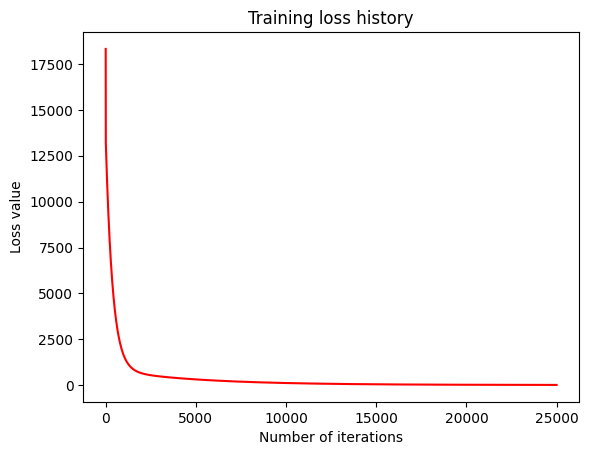

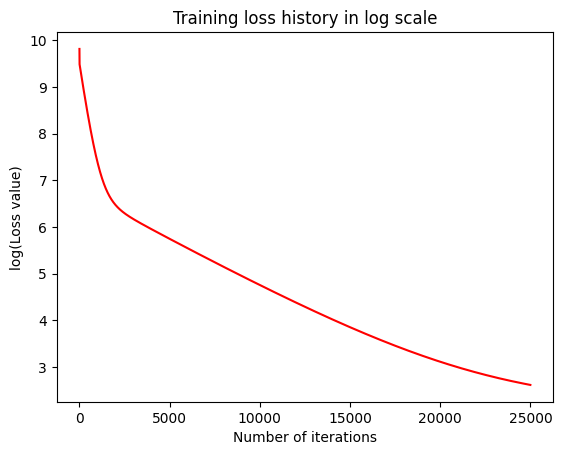

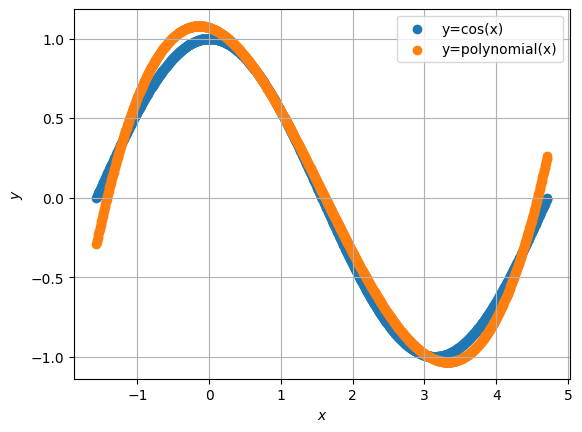

In [ ]:
# @title
%reset  -f
import numpy as np
import torch
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
torch.manual_seed(0)

# generate and visualize data for y=cos(x)
x = np.linspace(-0.5*np.pi, 1.5*np.pi, 2000)
y = np.cos(x)
## visualize the data
# plt.figure()
# plt.scatter(x, y, label='y=cos(x)')
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.title('$y=\cos(x)$')
# plt.grid()
# plt.show()

# create tensors for the data and initiliaze the coefficients
x = torch.from_numpy(x)
y = torch.from_numpy(y)
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

# hyperparameter setting
num_iterations = 25000
learning_rate = 1e-7
loss_values = []

# model training
for k in range(num_iterations):
    yhat = a + b * x + c * x ** 2 + d * x ** 3    # forward pass
    loss = torch.sum((yhat - y)**2)   # compute the loss
    loss_values.append(loss.item())   # store the loss value
    if k % 1000 == 99:
        print('Iteration', k, 'Loss=', loss.item())
    loss.backward()   # compute gradeints by .backward()

    # manually update the parameters using gradient descend
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        # manually clear gradients after the updates
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 ')

# plot the training loss history
plt.figure()
plt.plot(loss_values, 'r')
plt.xlabel('Number of iterations')
plt.ylabel('Loss value')
plt.title('Training loss history')
plt.show()

# plot the training loss history in log scale
plt.figure()
plt.plot(np.log(loss_values), 'r')
plt.xlabel('Number of iterations')
plt.ylabel('log(Loss value)')
plt.title('Training loss history in log scale')
plt.show()

# test the model performance and plotting
xtest = torch.linspace(-0.5*torch.pi, 1.5*torch.pi, 1111, device=device, dtype=dtype)
ytest = torch.cos(xtest)
y_model = a + b * xtest + c * xtest ** 2 + d * xtest ** 3
plt.figure()
plt.scatter(xtest.detach(), ytest.detach(), label='y=cos(x)')
plt.scatter(xtest.detach(), y_model.detach(), label='y=polynomial(x)')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

# **Sec 2: Building a neural network in Pytorch**

## Using low level APIs

ANN_low()
batch =      0batch loss = 12.23018551

batch =   3200batch loss = 0.00945152

batch =   6400batch loss = 0.00008374

batch =   9600batch loss = 0.00003397

batch =  12800batch loss = 0.00000851

batch =  16000batch loss = 0.00000327

batch =  19200batch loss = 0.00001338

batch =  22400batch loss = 0.00198697

batch =  25600batch loss = 0.00000134

batch =  28800batch loss = 0.00011889



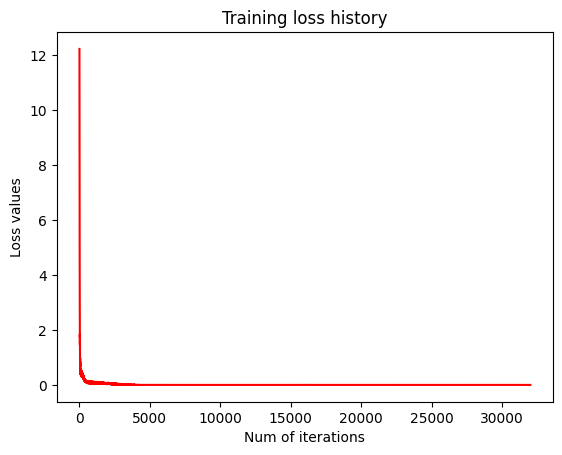

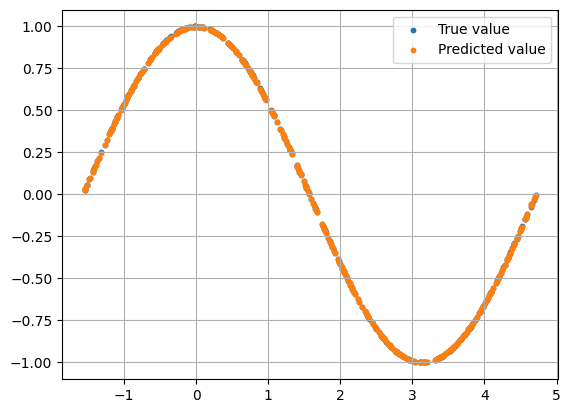

w1: Parameter containing:
tensor([[ 0.7036,  0.5555,  0.8101,  1.7896, -1.3435, -1.9625]],
       requires_grad=True)
w1.grad: tensor([[ 5.1134e-04,  5.0835e-04,  5.0919e-04, -6.1508e-04, -6.8480e-05,
          2.4964e-04]])
b1 Parameter containing:
tensor([-3.2420, -2.5995, -3.5981, -4.3405, -0.4497, -3.4900],
       requires_grad=True)
b1.grad: Parameter containing:
tensor([-3.2420, -2.5995, -3.5981, -4.3405, -0.4497, -3.4900],
       requires_grad=True)


In [ ]:
########## build a neural network using low level APIs
%reset  -f
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

########## customized your own activation functions
# def softplus(x):
#   return torch.log(1.0+torch.exp(-x))
def sigmoid(x):
  return 1.0/(1.0+torch.exp(-x))

class ANN_low(nn.Module):
    def __init__(self, in_dim = 1, out_dim = 1, neurons = [6, 6], act_fn = sigmoid):
        super(ANN_low, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.neurons = neurons
        self.act_fn = act_fn
        ## input layer
        self.w1 = torch.rand(self.in_dim, self.neurons[0], requires_grad=True) # create a weight matrix
        self.w1 = nn.Parameter(self.w1) # register this tensor as an nn.Parameter for Optimizer
        self.b1 = nn.Parameter(torch.zeros(self.neurons[0], requires_grad=True))
        ##  hidden layer
        self.w2 = nn.Parameter(torch.rand(self.neurons[0], self.neurons[1], requires_grad=True))
        self.b2 = nn.Parameter(torch.zeros(self.neurons[1], requires_grad=True))
        ## output layer
        self.w3 = nn.Parameter(torch.rand(self.neurons[1], 1, requires_grad=True))
        self.b3 = nn.Parameter(torch.zeros(1, requires_grad=True))
        ## activation function
    def forward(self,x):
        z = torch.matmul(x, self.w1) + self.b1
        z = self.act_fn(z)
        z = torch.matmul(z, self.w2) + self.b2
        z = self.act_fn(z)
        z = torch.matmul(z, self.w3) + self.b3
        return z

########## generate data set
N_samples = 2000
x = torch.linspace(-0.5*math.pi, 1.5*math.pi, steps=N_samples, requires_grad=False)
y = torch.cos(x)

########## prepare the training data and test data sets
indices = np.arange(0, N_samples)
np.random.shuffle(indices)    # shuffle the indicies
index_split = math.floor(0.8*N_samples)
indices_train = indices[0:index_split]
indices_test = indices[index_split:-1]
x = torch.reshape(x, (-1, 1))
x_train = x[indices_train]
y_train = y[indices_train]
x_test = x[indices_test]
y_test = y[indices_test]

########## initialize the ANN model
in_dim = 1
out_dim = 1
neurons = [6, 6]
model = ANN_low(in_dim, out_dim, neurons, sigmoid)
print(model)

########## hyperparameters setting
torch.manual_seed(0)
learning_rate = 1e-2
epoch = 1000
batch_size = 50
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

N_train = len(x_train)
batches_per_epoch = N_train // batch_size
num_iterations = epoch * batches_per_epoch
loss_hist = []

########## train the model
for k in range(num_iterations):
    current_index = np.random.choice(N_train, batch_size,
          replace = False)
    batchX = x_train[current_index]
    batchY = y_train[current_index].view(batch_size,1)
    optimizer.zero_grad()     # clear the gradients w.r.t parameters
    batchY_pred = model.forward(batchX)   # forward pass
    loss_value = loss_fn(batchY_pred, batchY)   # compute the loss value
    loss_value.backward()   # automatic differentiate to get the gradients
    optimizer.step()    # use optimizer to update the parameters
    # with torch.no_grad():   # manually update parameters and clear gradients
    #     model.w1 -=learning_rate*model.w1.grad
    #     model.b1 -=learning_rate*model.b1.grad
    #     model.w2 -=learning_rate*model.w2.grad
    #     model.b2 -=learning_rate*model.b2.grad
    #     model.w3 -=learning_rate*model.w3.grad
    #     model.b3 -=learning_rate*model.b3.grad
    #     model.w1.grad = None
    #     model.b1.grad = None
    #     model.w2.grad = None
    #     model.b2.grad = None
    #     model.w3.grad = None
    #     model.b3.grad = None
    loss_hist.append(loss_value.item())
    if k % (num_iterations // 10) == 0:
        print("batch = %6d" % k, end="")
        print("batch loss = %10.8f" % loss_value.item(), end="")
        print("\n")

########## plot the training loss history
plt.figure()
plt.plot(loss_hist, 'r')
# plt.plot(np.log(loss_hist), 'r')  # loss in log scale
plt.xlabel('Num of iterations')
plt.ylabel('Loss values')
plt.title('Training loss history')
plt.show()

########## test the model
y_test_pred = model.forward(x_test)    # predicted values from the trained model
plt.figure()
plt.scatter(x_test.detach(), y_test.detach(), s=10, label="True value")
plt.scatter(x_test.detach(), y_test_pred.detach(), s=10, label='Predicted value')
plt.legend()
plt.grid()
plt.show()

########## print the parameters and their gradients
print('w1:', model.w1)
print('w1.grad:', model.w1.grad)
print('b1', model.b1)
print('b1.grad:', model.b1)

## Using high level APIs, and save & load the models

@iteration: 0  #Loss: 0.5727867484092712
@iteration: 3200  #Loss: 0.0667804479598999
@iteration: 6400  #Loss: 0.07105604559183121
@iteration: 9600  #Loss: 0.07038766145706177
@iteration: 12800  #Loss: 0.07425576448440552
@iteration: 16000  #Loss: 0.062071461230516434
@iteration: 19200  #Loss: 0.07186432927846909
@iteration: 22400  #Loss: 0.07033489644527435
@iteration: 25600  #Loss: 0.06644637137651443
@iteration: 28800  #Loss: 0.06728848814964294


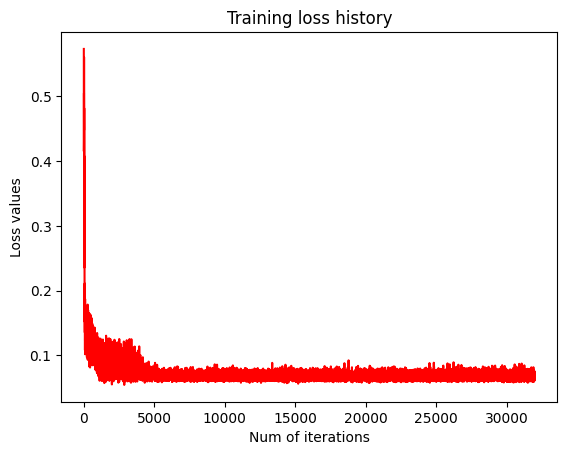

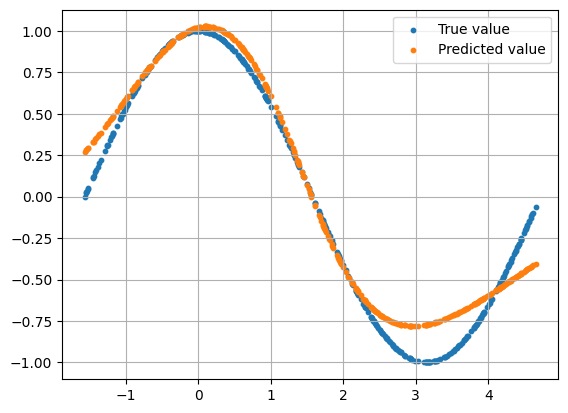

model.layer1.weight: Parameter containing:
tensor([[-0.4004],
        [ 0.3074],
        [-1.3508],
        [-1.7266],
        [-0.4000],
        [ 1.6180]], requires_grad=True)
model.layer1.bias: Parameter containing:
tensor([ 1.0370, -0.3038,  1.3498,  2.4338,  1.0344,  1.1152],
       requires_grad=True)
model.layer1.weight.grad: tensor([[-0.0370],
        [ 0.0109],
        [ 0.0074],
        [ 0.0156],
        [-0.0369],
        [-0.0031]])
model.layer1.bias.grad: tensor([-0.0227,  0.0085,  0.0092,  0.0136, -0.0226,  0.0089])


In [ ]:
# @title
########## build a neural network using high level APIs
%reset  -f
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

class ANN_high(nn.Module):
    def __init__(self, in_dim = 1, out_dim = 1, neurons = [6, 6], act_fn = nn.Sigmoid):
        super(ANN_high, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.neurons = neurons
        self.act_fn = act_fn()    # activation function
        self.layer1 = nn.Linear(self.in_dim, self.neurons[0])   # input layer
        self.layer2 = nn.Linear(self.neurons[0], self.neurons[1])   # hidden layer
        self.layer3 = nn.Linear(self.neurons[1], self.out_dim)    # output layer
        ## put all the layers together in order
        self.forwardpass = nn.Sequential(self.layer1, self.act_fn,
                   self.layer2, self.act_fn, self.layer3)
    def forward(self, x):
        y = self.forwardpass(x)
        return y

########## generate data set
N_samples = 2000
x = torch.linspace(-0.5*math.pi, 1.5*math.pi, steps = N_samples, requires_grad=False)
y = torch.cos(x)
## visualize the data
# plt.figure
# plt.plot(x, y)
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.title('$y=\cos(x)$')
# plt.grid()

########## prepare the training data and test data sets
indices = np.arange(0, N_samples)
np.random.shuffle(indices)    # shuffle the indicies of the data set
index_split = math.floor(0.8 * N_samples)
indices_train = indices[0:index_split]
indices_test  = indices[index_split:-1]
x = torch.reshape(x, (-1, 1))
x_train = x[indices_train]    # split the data set
y_train = y[indices_train]
x_test = x[indices_test]
y_test = y[indices_test]

########## initialize the ANN model
in_dim = 1
out_dim = 1
neurons = [6, 6]
model = ANN_high(in_dim, out_dim, neurons, torch.nn.Sigmoid)
# print(model)

# ## test the model before training (just for debugging)
# y_test_pred = model.forward(x_test)
# plt.figure(1)
# plt.scatter(x_test.detach(),y_test.detach(),label="True value")
# plt.scatter(x_test.detach(),y_test_pred.detach(),label='Predicted value')
# plt.legend()

########## hyperparameters setting
torch.manual_seed(0)
learning_rate = 1e-2
epoch = 1000
batch_size = 50
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

N_train = len(x_train)
batches_per_epoch = N_train // batch_size
num_iterations = epoch * batches_per_epoch
loss_hist = []

########## train the model
for k in range(num_iterations):
    current_index = np.random.choice(N_train, batch_size,
          replace = False)
    batchX = x_train[current_index]
    batchY = y_train[current_index].view(batch_size, 1)
    optimizer.zero_grad()     # clear the gradients w.r.t parameters
    batchY_pred = model.forward(batchX)   # foward pass
    loss_value = loss_fn(batchY_pred, batchY)  # compute the loss value

    # use this block of code for L2 or L1 regularization
    lambda_coeff = 0.001
    l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
    #l1_norm = sum(p.abs().sum() for p in model.parameters())
    loss_value = loss_value + lambda_coeff  * l2_norm

    loss_value.backward()   # automatic differentiate to get the gradients
    optimizer.step()        # use optimizer to update model parameters
    loss_hist.append(loss_value.item())
    if k % (num_iterations // 10) == 0:
      print("@iteration:", k, " #Loss:", loss_value.item())

########## plot loss history
plt.figure()
plt.plot(loss_hist, 'r')
# plt.plot(np.log(loss_hist), 'r')    # loss in log scale
plt.xlabel('Num of iterations')
plt.ylabel('Loss values')
plt.title('Training loss history')
plt.show()

########## test the model
y_test_pred = model.forward(x_test) # predicted values from the trained model
plt.figure()
plt.scatter(x_test.detach(), y_test.detach(), s=10, label="True value")
plt.scatter(x_test.detach(), y_test_pred.detach(), s=10, label='Predicted value')
plt.legend()
plt.grid()
plt.show()

########## print the parameters and their gradients
print('model.layer1.weight:', model.layer1.weight)
print('model.layer1.bias:', model.layer1.bias)
print('model.layer1.weight.grad:',model.layer1.weight.grad)
print('model.layer1.bias.grad:',model.layer1.bias.grad)

In [ ]:
# @title
###### save and reload the model
### method 1: save and load the model for inference
# model_file = 'model.pth'    # choose your own path for the file
# torch.save(model, model_file)
# # load model from a file
# model_loaded = torch.load(model_file)
# model.eval() # run this before inference if you used dropout or batch normalization

# y_test_pred = model_loaded.forward(x_test)
# plt.figure()
# plt.scatter(x_test.detach(),y_test.detach(),label="True value")
# plt.scatter(x_test.detach(),y_test_pred.detach(),label='Predicted value (Loaded)')
# plt.grid()
# plt.legend()
# plt.show()

### method 2: save and load the model for inference/training
# collect relevant information
PATH = "model.pt"
EPOCH = 5
LOSS = 0.01
torch.save({
            'epoch': EPOCH,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': LOSS,
            }, PATH)
model_reloaded = ANN_high(in_dim, out_dim, neurons, torch.nn.Sigmoid)
optimizer = torch.optim.Adam(model_reloaded.parameters(), lr=learning_rate)
checkpoint = torch.load(PATH)
model_reloaded.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# model_reloaded.eval()
# - or -
model_reloaded.train()